In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


here the objective is to fit the logit graph model to multiple different graph domains and then visualize the original vs fitted graphs

In [14]:

import sys
import os
sys.path.append('../..')

#Graph imports
import src.logit_graph.graph as graph
import src.logit_graph.logit_estimator as estimator
import src.logit_graph.utils as utils
import src.logit_graph.model_selection as model_selection
import src.logit_graph.gic as gic
import src.logit_graph.param_estimator as pe
import src.logit_graph.graph as graph
import src.logit_graph.model_selection as ms

# usual imports
import matplotlib.pyplot as plt
import pickle
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx
from numpy import errstate

from IPython.display import display
from pyvis.network import Network
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [15]:
FOLDER_OUTPUT = f'runs/fitted_graphs_comparison_gplus1'
out_files = os.listdir(FOLDER_OUTPUT)
out_files = sorted(out_files, key=lambda x: os.path.getctime(os.path.join(FOLDER_OUTPUT, x)), reverse=True)

out_files

['comparators_109342148209917802565.pkl',
 'comparators_100521671383026672718.pkl',
 'comparators_115360471097759949621.pkl',
 'comparators_112317819390625199896.pkl',
 'comparators_107965826228461029730.pkl',
 'comparators_115576988435396060952.pkl',
 'comparators_101541879642294398860.pkl',
 'comparators_112737356589974073749.pkl',
 'comparators_104672614700283598130.pkl',
 'comparators_114336431216099933033.pkl',
 'comparators_104105354262797387583.pkl',
 'comparators_103503116383846951534.pkl',
 'comparators_108404515213153345305.pkl',
 'comparators_103251633033550231172.pkl',
 'comparators_100466178325794757407.pkl',
 'comparators_110614416163543421878.pkl',
 'comparators_100518419853963396365.pkl',
 'comparators_113597493946570654755.pkl',
 'comparators_114104634069486127920.pkl',
 'comparators_117503822947457399073.pkl',
 'comparators_100637660947564674695.pkl',
 'comparators_101499880233887429402.pkl',
 'comparators_111213696402662884531.pkl',
 'comparators_11741217533309624427

In [17]:
import pickle
import sys, importlib, pickle
sys.modules['src.simulation'] = importlib.import_module('src.logit_graph.simulation')  # or 'logit_graph.simulation'

#pick first id from out_files
id = out_files[0].split('_')[1]

with open(f'{FOLDER_OUTPUT}/comparators_{id}', 'rb') as f:
    comparators = pickle.load(f)


In [18]:
len(comparators)

32

In [19]:
dfs = []
for i in range(len(comparators)):
    dfs.append(comparators[i].summary_df)

In [20]:
dfs[1]

graph_filename     model  gic_value                 param  \
0  113455290791279442483.edges  Original        NaN                   N/A   
1  113455290791279442483.edges        LG   0.014621  d=2, sigma=-170.9213   
2  113455290791279442483.edges        ER   0.284386                   0.2   
3  113455290791279442483.edges        BA   0.702993                   5.0   
4  113455290791279442483.edges       GRG   1.726044                   1.0   
5  113455290791279442483.edges        WS   1.760145             20.178889   

   fit_success  nodes  edges   density  avg_clustering  avg_path_length  \
0         True    108   2352  0.407061        0.690156         1.598477   
1         True    108   2125  0.367774        0.368070         1.632226   
2         True    108   1201  0.207857        0.208110         1.801488   
3         True    108    515  0.089131        0.179604         2.268951   
4         True    108   5684  0.983731        0.985327         1.016269   
5         True    108   2376  0.411215        0.411166         1.588785   

   diameter  assortativity  num_components  largest_component_size  
0         3      -0.244844               1                     108  
1         2      -0.013983               1                     108  
2         3      -0.028331               1                     108  
3         4      -0.076620               1                     108  
4         2      -0.045163               1                     108  
5         2      -0.015830               1                     108

In [21]:
pd.concat(dfs)

graph_filename     model  gic_value                param  \
0   102615863344410467759.edges  Original        NaN                  N/A   
1   102615863344410467759.edges        LG   0.426997  d=2, sigma=-32.4977   
2   102615863344410467759.edges        ER   0.282287                  0.2   
3   102615863344410467759.edges        BA   0.346601                  5.0   
4   102615863344410467759.edges        WS   1.391627            20.157778   
..                          ...       ...        ...                  ...   
1   109342148209917802565.edges        LG   0.133619   d=1, sigma=-5.7820   
2   109342148209917802565.edges        ER   0.134774             0.115556   
3   109342148209917802565.edges        BA   0.601112                  5.0   
4   109342148209917802565.edges        WS   1.663711            20.178889   
5   109342148209917802565.edges       GRG   2.224254                  1.0   

    fit_success  nodes   edges   density  avg_clustering  avg_path_length  \
0          True    102    1169  0.226946        0.597790         1.791303   
1          True    102    1163  0.225781        0.226596         1.779072   
2          True    102    1050  0.203844        0.197667         1.804698   
3          True    102     485  0.094156        0.154491         2.268492   
4          True    102    1122  0.217822        0.212017         1.788391   
..          ...    ...     ...       ...             ...              ...   
1          True    550   15932  0.105527        0.105463         1.896400   
2          True    550   17349  0.114913        0.114737         1.885630   
3          True    550    2725  0.018049        0.055046         2.821500   
4          True    550   15950  0.105647        0.103653         1.895950   
5          True    550  146914  0.973102        0.976543         1.026898   

    diameter  assortativity  num_components  largest_component_size  
0          3      -0.358295               1                     102  
1          3      -0.035959               1                     102  
2          3      -0.006689               1                     102  
3          4      -0.044186               1                     102  
4          3      -0.037944               1                     102  
..       ...            ...             ...                     ...  
1          3       0.002315               1                     550  
2          3      -0.002870               1                     550  
3          4      -0.060727               1                     550  
4          3      -0.004538               1                     550  
5          2      -0.035116               1                     550  

[192 rows x 14 columns]

In [22]:
# Create a DataFrame with GIC values for each model and graph
gic_df = pd.DataFrame()

for df in dfs:
    graph_name = df['graph_filename'].iloc[0]
    # Get GIC values for each model (excluding Original which has NaN)
    model_gics = df[df['model'] != 'Original'].set_index('model')['gic_value']
    gic_df[graph_name] = model_gics

# Transpose so graphs are rows and models are columns
gic_df = gic_df.T
gic_df

model                              LG        ER        BA        WS       GRG
102615863344410467759.edges  0.426997  0.282287  0.346601  1.391627  5.096360
113455290791279442483.edges  0.014621  0.284386  0.702993  1.760145  1.726044
117866881767579360121.edges  0.421547  1.937106  0.506701  1.102526  7.321368
110232479818136355682.edges  0.737491  1.741964  0.493616  1.026964  7.793429
103241736833663734962.edges  1.420944  1.397497  0.703680  1.178889  6.662467
117798157258572080176.edges  1.456703  3.177212  1.488068  0.922381  7.894253
114054672576929802335.edges  1.025417  1.109970  1.264286  1.502292  2.741588
118255645714452180374.edges  0.099664  0.165434  0.733533  1.765583  1.225340
117412175333096244275.edges  1.191174  3.690451  1.224110  0.805347  8.957375
111213696402662884531.edges  0.152789  0.145423  0.606795  1.648672  2.223929
101499880233887429402.edges  0.297944  0.278400  0.570737  1.530437  3.043877
100637660947564674695.edges  0.327456  1.010407  0.748021  1.227724  5.658293
117503822947457399073.edges  0.719836  0.452229  0.894410  1.644164  1.541284
114104634069486127920.edges  0.309328  0.301130  0.639112  1.701409  1.847805
113597493946570654755.edges  0.850899  0.847057  0.678863  1.412362  3.558681
100518419853963396365.edges  0.408445  0.408082  0.585964  1.582140  2.719819
110614416163543421878.edges  0.217210  0.221544  0.859364  1.707786  1.560097
100466178325794757407.edges  0.375822  1.594607  0.483583  1.065213  6.896266
103251633033550231172.edges  0.938083  0.930272  0.636185  1.225530  6.047720
108404515213153345305.edges  0.659788  0.519581  0.589102  1.535980  3.310835
103503116383846951534.edges  1.263816  1.224037  0.552727  1.207938  5.760362
104105354262797387583.edges  0.359640  0.325283  0.831147  1.730663  1.394599
114336431216099933033.edges  1.385691  1.266711  0.670510  1.252043  4.775061
104672614700283598130.edges  0.192415  0.196368  0.752832  1.773368  1.309566
112737356589974073749.edges  0.160062  0.428479  0.840715  1.870204  0.837082
101541879642294398860.edges  0.312633  0.311081  0.595032  1.586521  2.481692
115576988435396060952.edges  0.515890  0.496729  0.801268  1.549505  2.784659
107965826228461029730.edges  0.186776  0.187896  0.731343  1.747237  1.421013
112317819390625199896.edges  0.386136  0.379002  0.573388  1.507516  3.056355
115360471097759949621.edges  0.054241  0.213891  0.850481  1.865877  0.626242
100521671383026672718.edges  0.247102  0.244721  0.808534  1.712314  1.524130
109342148209917802565.edges  0.133619  0.134774  0.601112  1.663711  2.224254

In [23]:
# Create a dictionary to store rankings for each graph
rankings = {}

# Go through each df in dfs
for df in dfs:
    graph_name = df['graph_filename'].iloc[0]  # Get graph filename
    
    # Sort models by GIC value (excluding 'Original' which has NaN GIC)
    model_ranks = df[df['model'] != 'Original'].sort_values('gic_value')['model'].tolist()
    
    # Create rankings dictionary for this graph (1 is best since lowest GIC is best)
    rankings[graph_name] = {
        model: rank+1 for rank, model in enumerate(model_ranks)
    }
    
    # Add nodes and edges from Original model
    original_row = df[df['model'] == 'Original'].iloc[0]
    rankings[graph_name]['nodes'] = original_row['nodes']
    rankings[graph_name]['edges'] = original_row['edges']

# Get unique models (excluding 'Original')
models = sorted(list(set([model for df in dfs for model in df['model'].unique() if model != 'Original'])))

# Create DataFrame with rankings
ranking_df = pd.DataFrame(rankings).T

# Ensure all models are present as columns
for model in models:
    if model not in ranking_df.columns:
        ranking_df[model] = np.nan

# Keep only the model columns in a consistent order, plus nodes and edges
ranking_df = ranking_df[models + ['nodes', 'edges']]

print("Rankings by GIC value (lower is better):")
display(ranking_df)


Rankings by GIC value (lower is better):


BA  ER  GRG  LG  WS  nodes  edges
102615863344410467759.edges   2   1    5   3   4    102   1169
113455290791279442483.edges   3   2    4   1   5    108   2352
117866881767579360121.edges   2   4    5   1   3    117    720
110232479818136355682.edges   1   4    5   2   3    120   1026
103241736833663734962.edges   1   3    5   4   2    131   1342
117798157258572080176.edges   3   4    5   2   1    168    892
114054672576929802335.edges   3   2    5   1   4    175   4138
118255645714452180374.edges   3   2    4   1   5    215   6189
117412175333096244275.edges   3   4    5   2   1    252    946
111213696402662884531.edges   3   1    5   2   4    258   7624
101499880233887429402.edges   3   1    5   2   4    268   5398
100637660947564674695.edges   2   3    5   1   4    296   3182
117503822947457399073.edges   3   1    4   2   5    307  11283
114104634069486127920.edges   3   1    5   2   4    320   8667
113597493946570654755.edges   1   2    5   3   4    321   7401
100518419853963396365.edges   3   1    5   2   4    326   8180
110614416163543421878.edges   3   2    4   1   5    338  10626
100466178325794757407.edges   2   4    5   1   3    344   3362
103251633033550231172.edges   1   2    5   3   4    373   5743
108404515213153345305.edges   2   1    5   3   4    417   5628
103503116383846951534.edges   1   3    5   4   2    422   5746
104105354262797387583.edges   3   1    4   2   5    452  12513
114336431216099933033.edges   1   3    5   4   2    461   4546
104672614700283598130.edges   3   2    4   1   5    475  18336
112737356589974073749.edges   4   2    3   1   5    476  27065
101541879642294398860.edges   3   1    5   2   4    488  15164
115576988435396060952.edges   3   1    5   2   4    492  11773
107965826228461029730.edges   3   2    4   1   5    495  16755
112317819390625199896.edges   3   1    5   2   4    498  11758
115360471097759949621.edges   4   2    3   1   5    511  35013
100521671383026672718.edges   3   1    4   2   5    521  16558
109342148209917802565.edges   3   2    5   1   4    550  15889

In [24]:
ranking_df.mean(axis=0)

BA          2.53125
ER          2.06250
GRG         4.62500
LG          1.93750
WS          3.84375
nodes     337.40625
edges    8968.25000
dtype: float64

In [25]:
ranking_df['nodes'].describe()

count     32.000000
mean     337.406250
std      142.092396
min      102.000000
25%      242.750000
50%      332.000000
75%      475.250000
max      550.000000
Name: nodes, dtype: float64

In [26]:
len(ranking_df)

32

# Gen all Plots

gplus_0


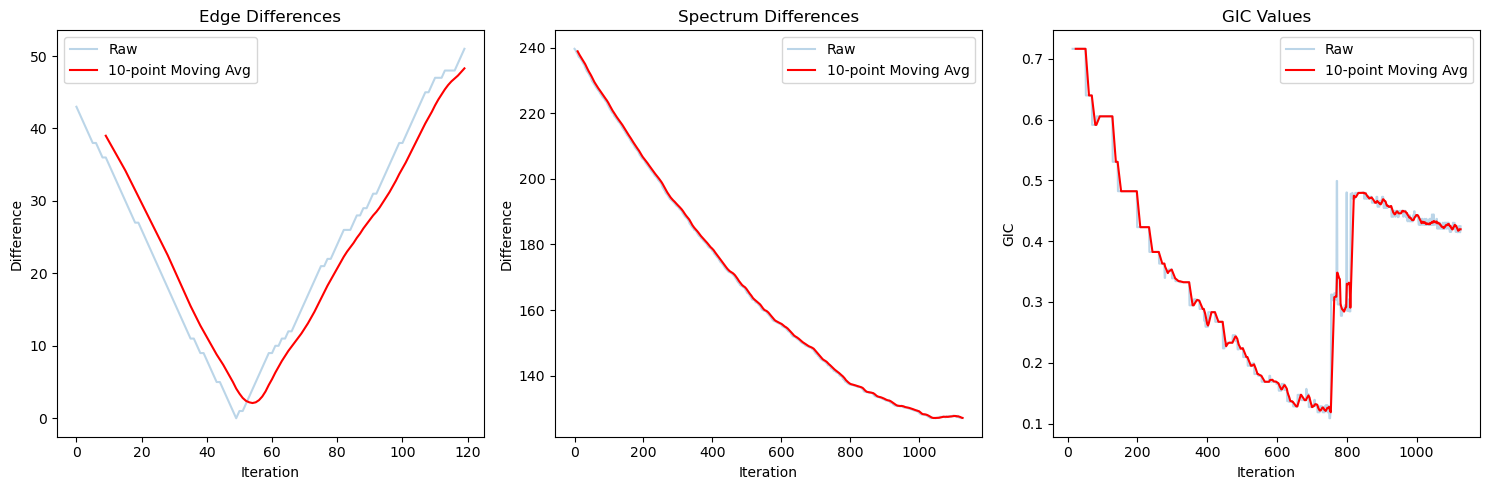

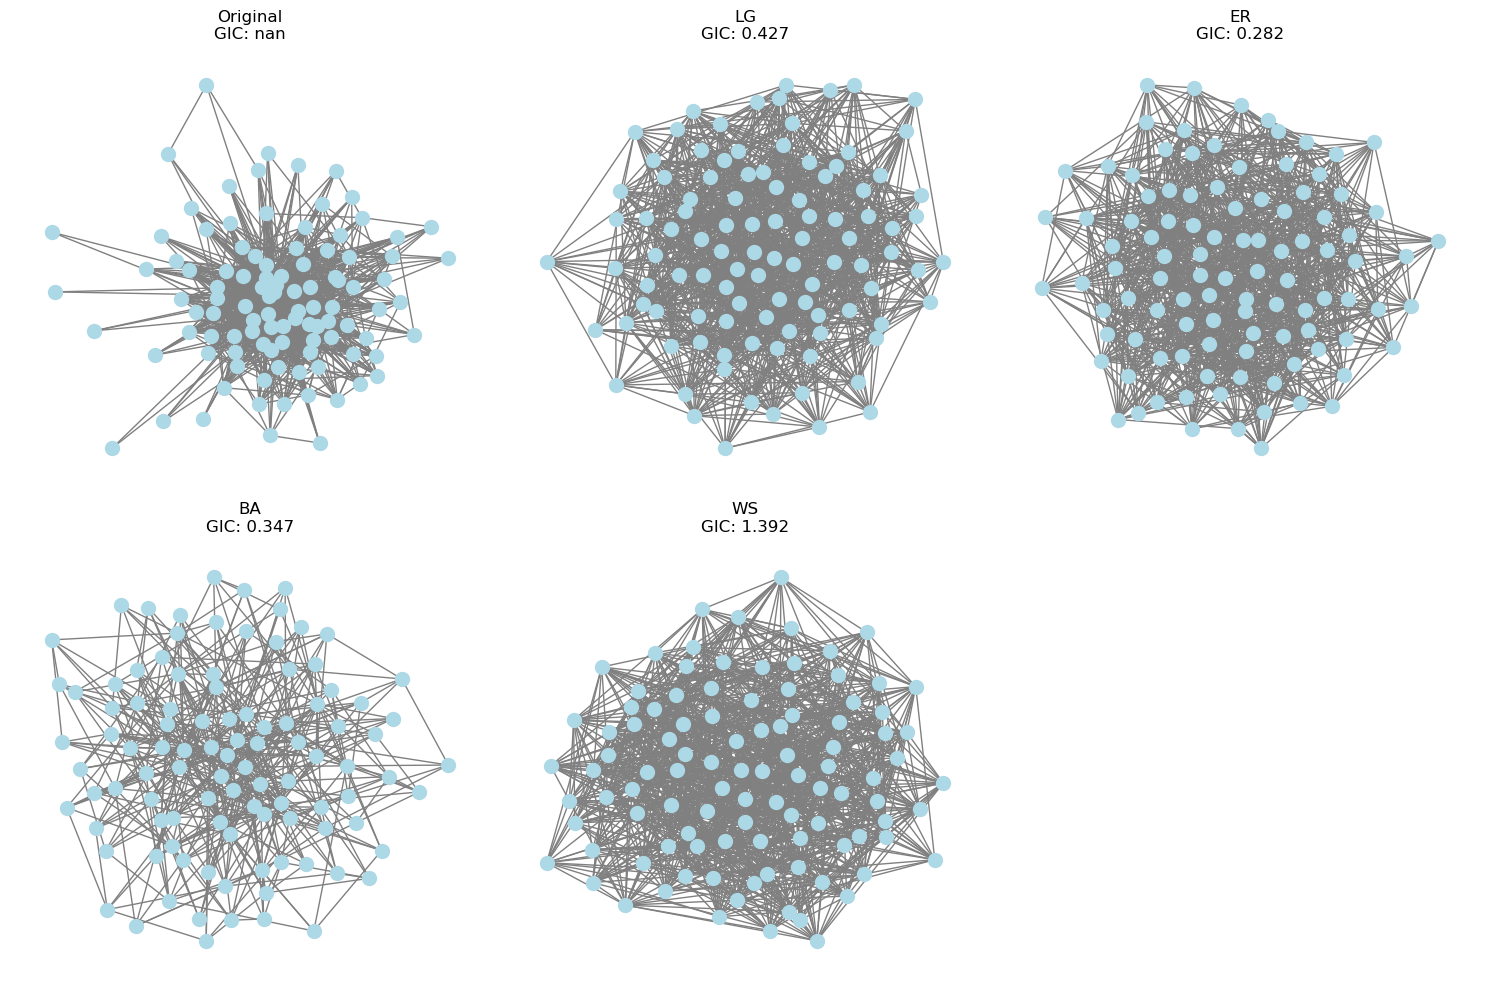

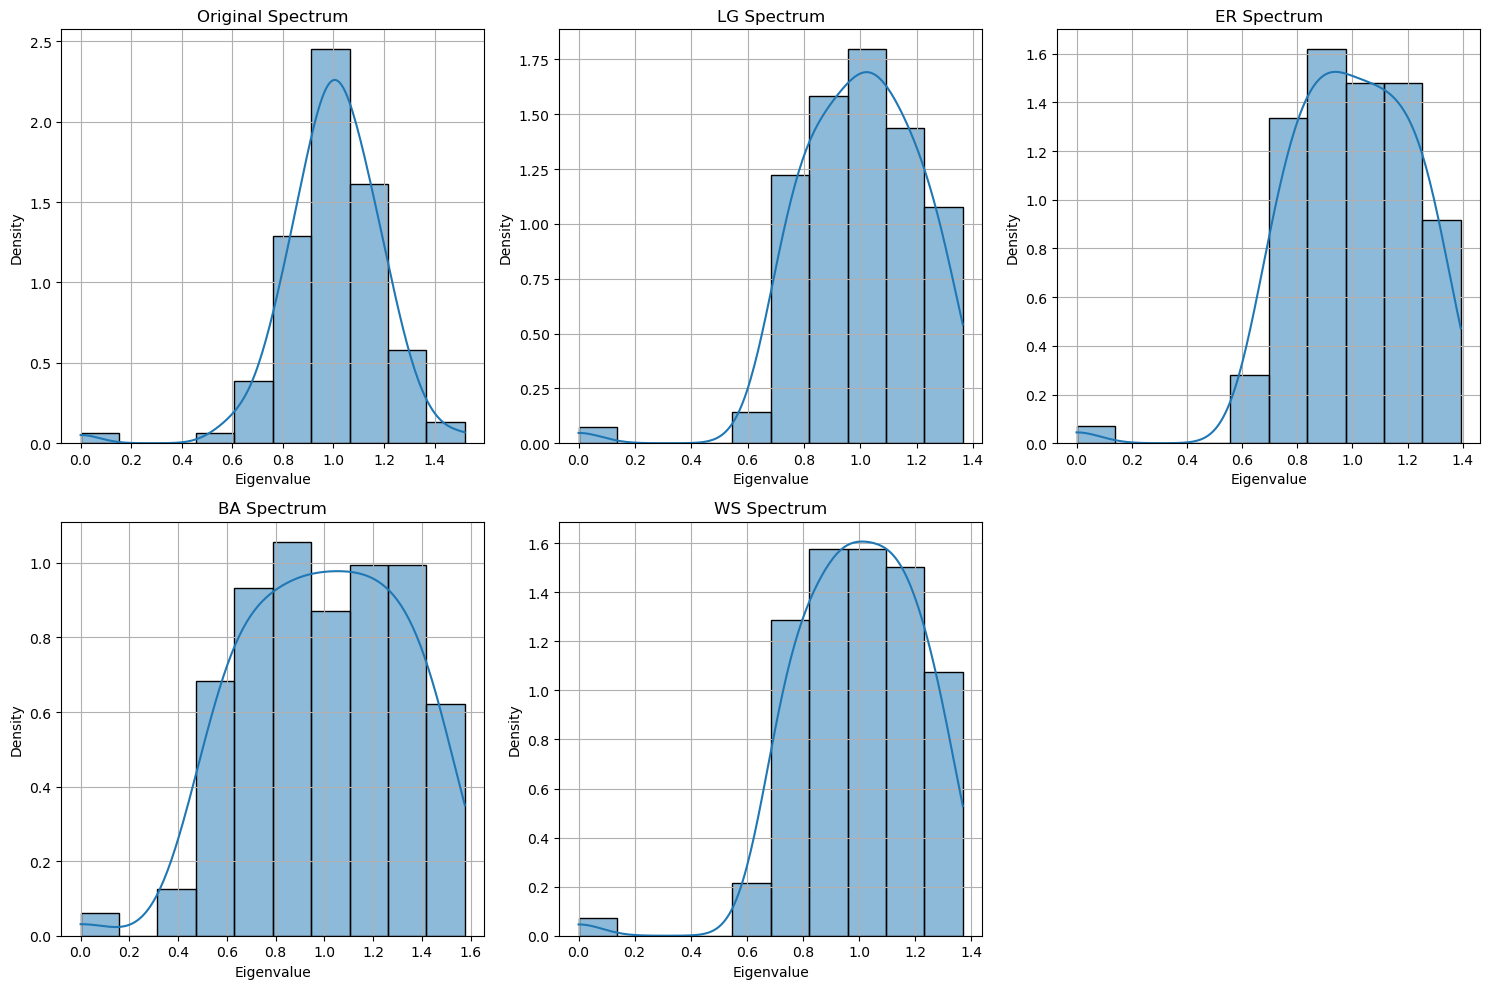

gplus_1


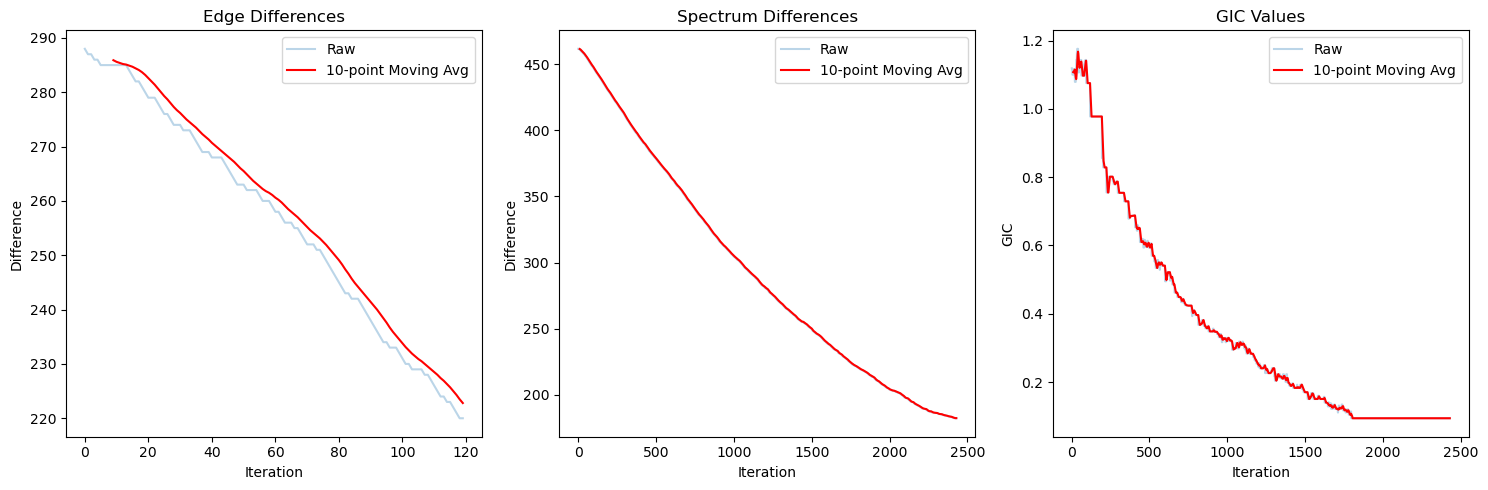

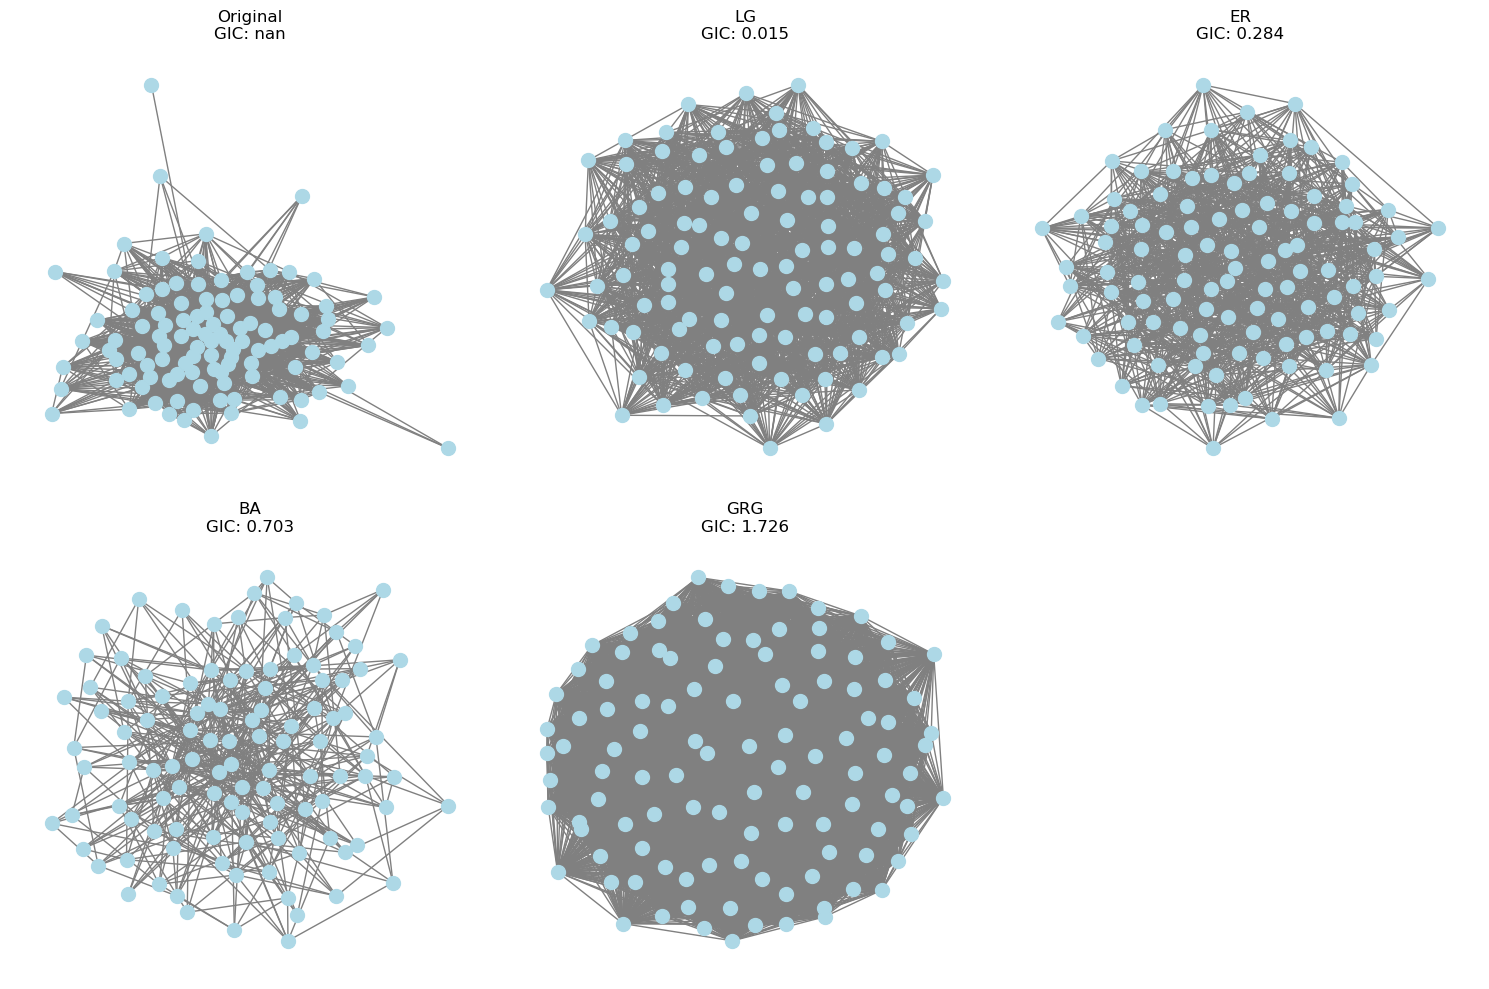

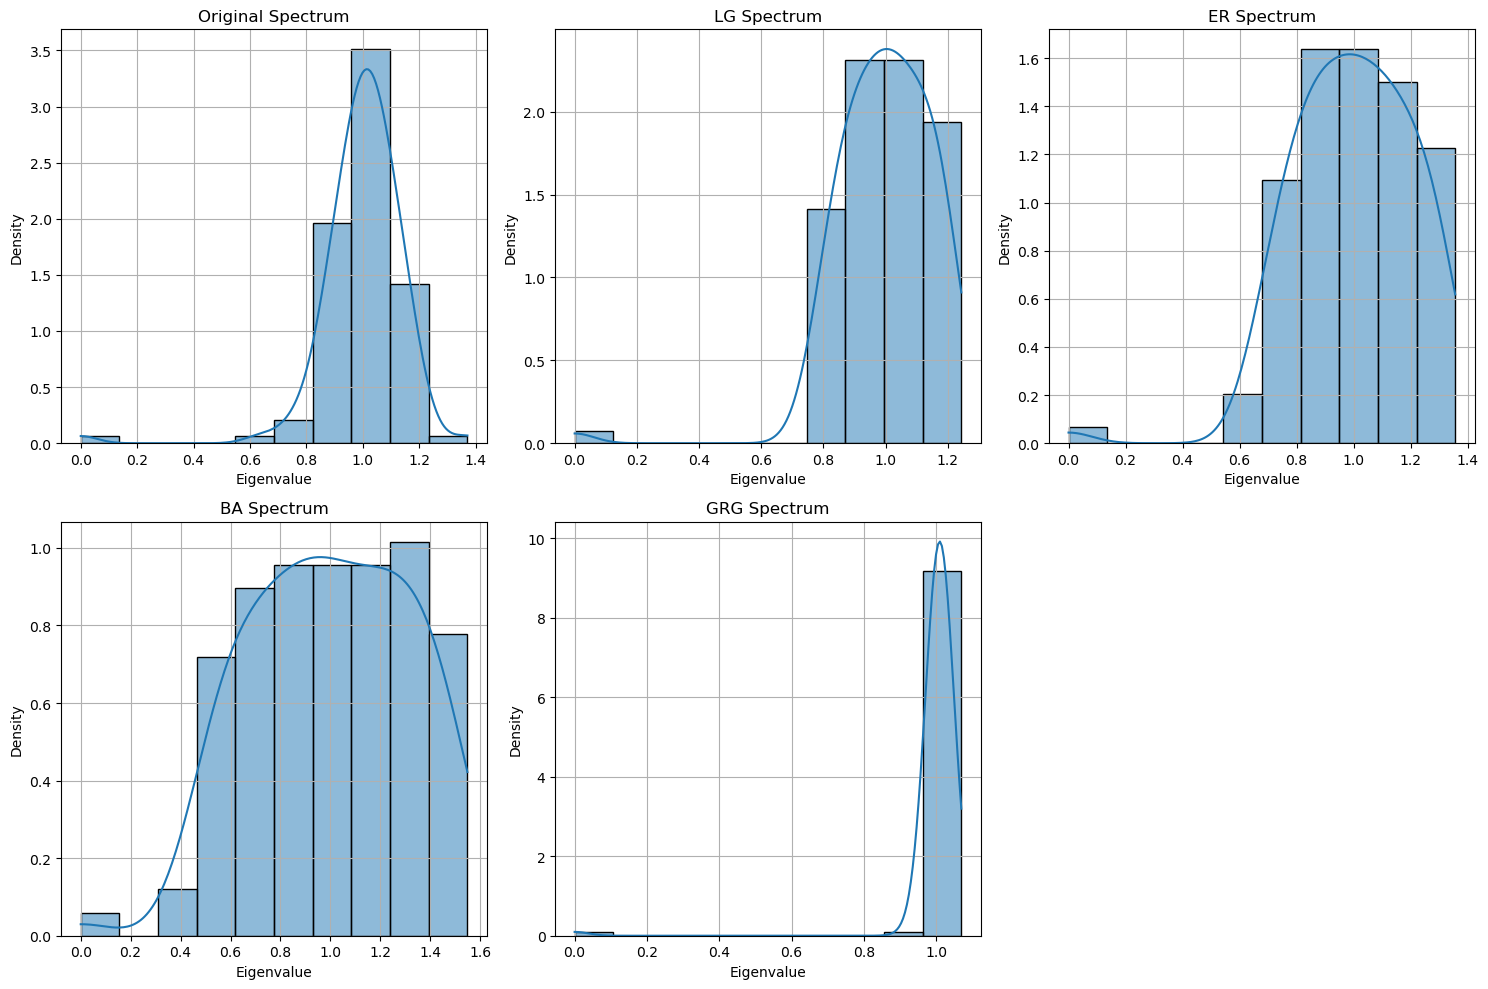

gplus_2


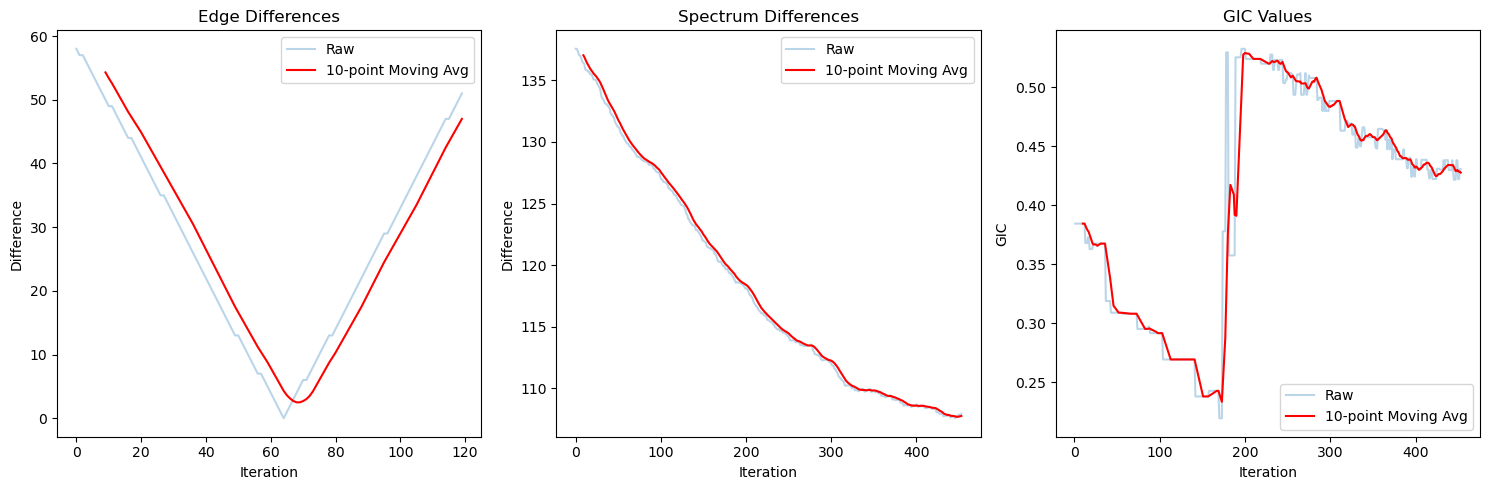

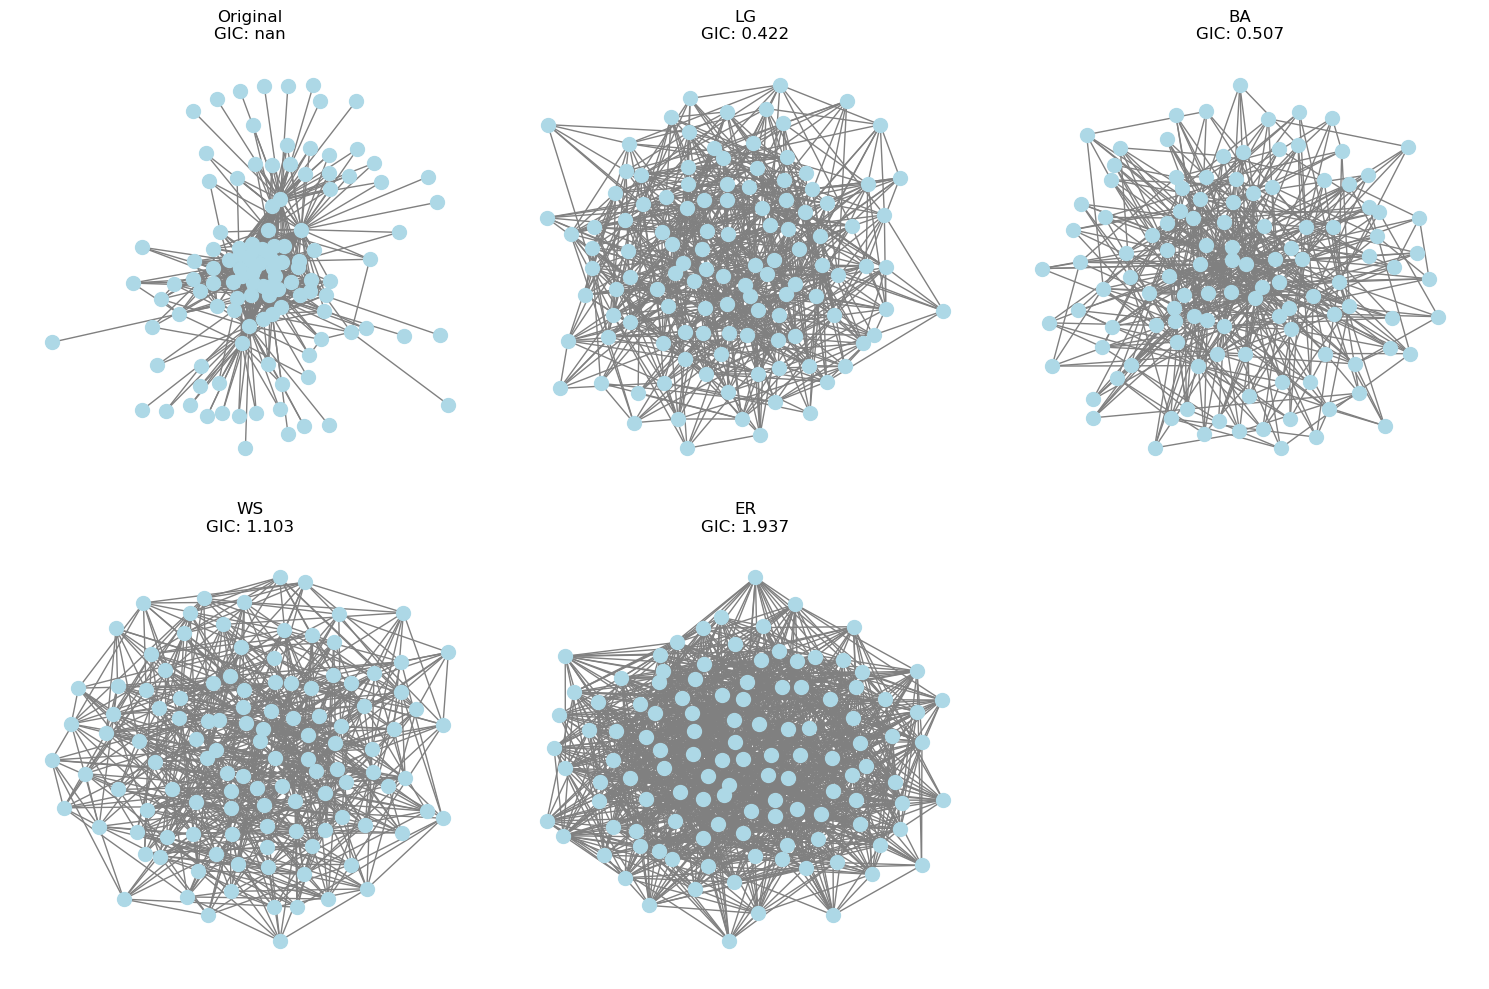

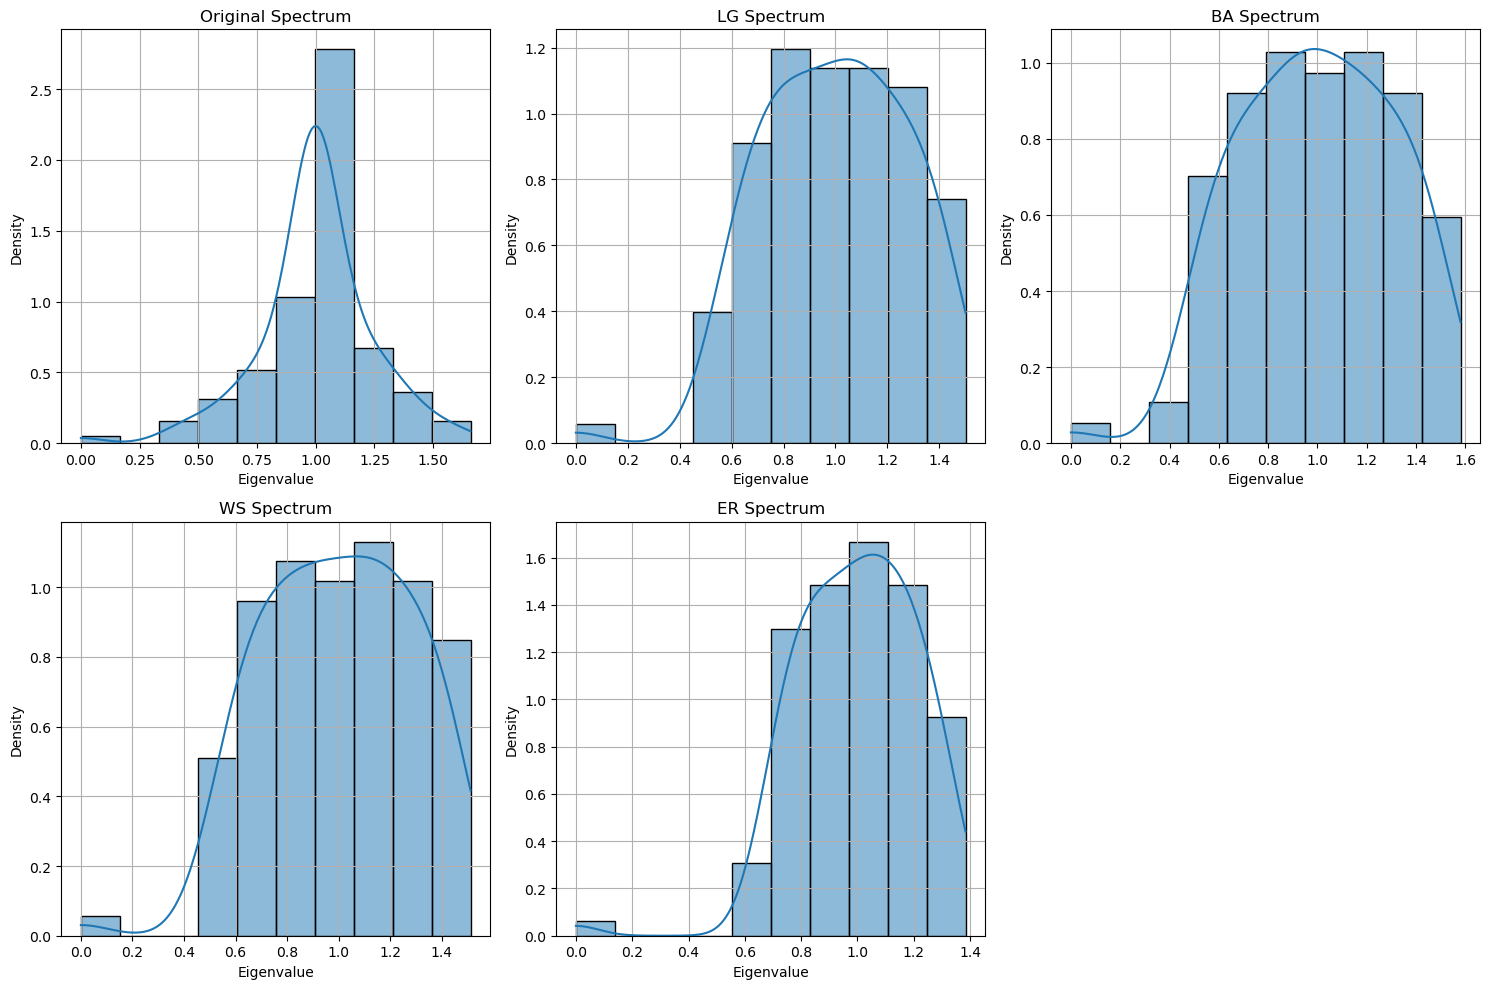

gplus_3


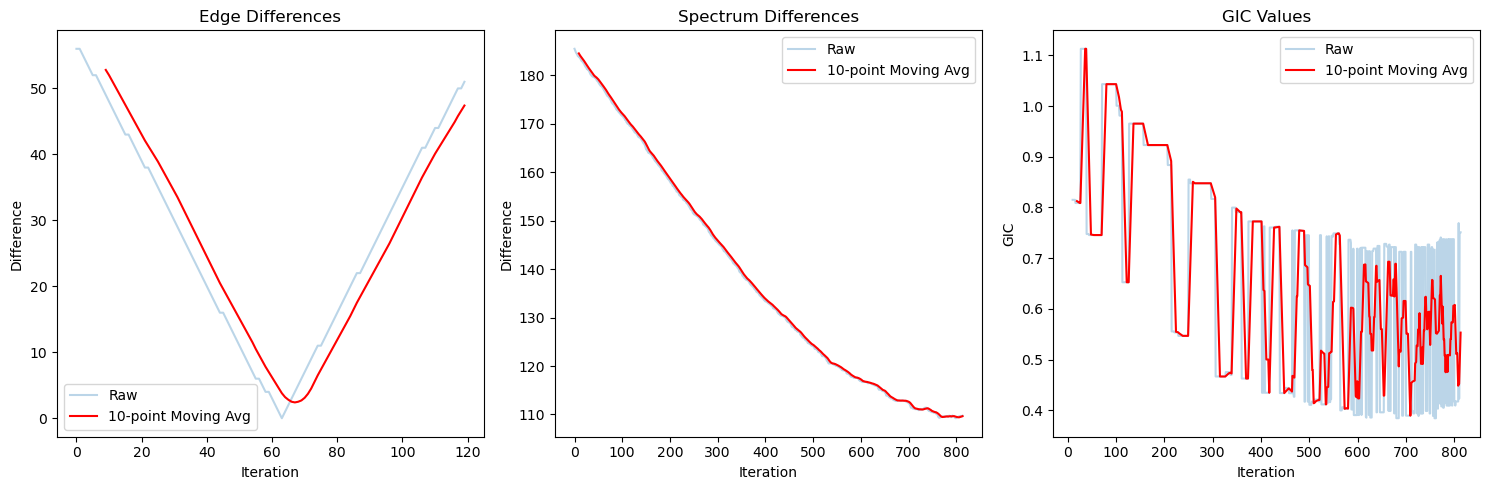

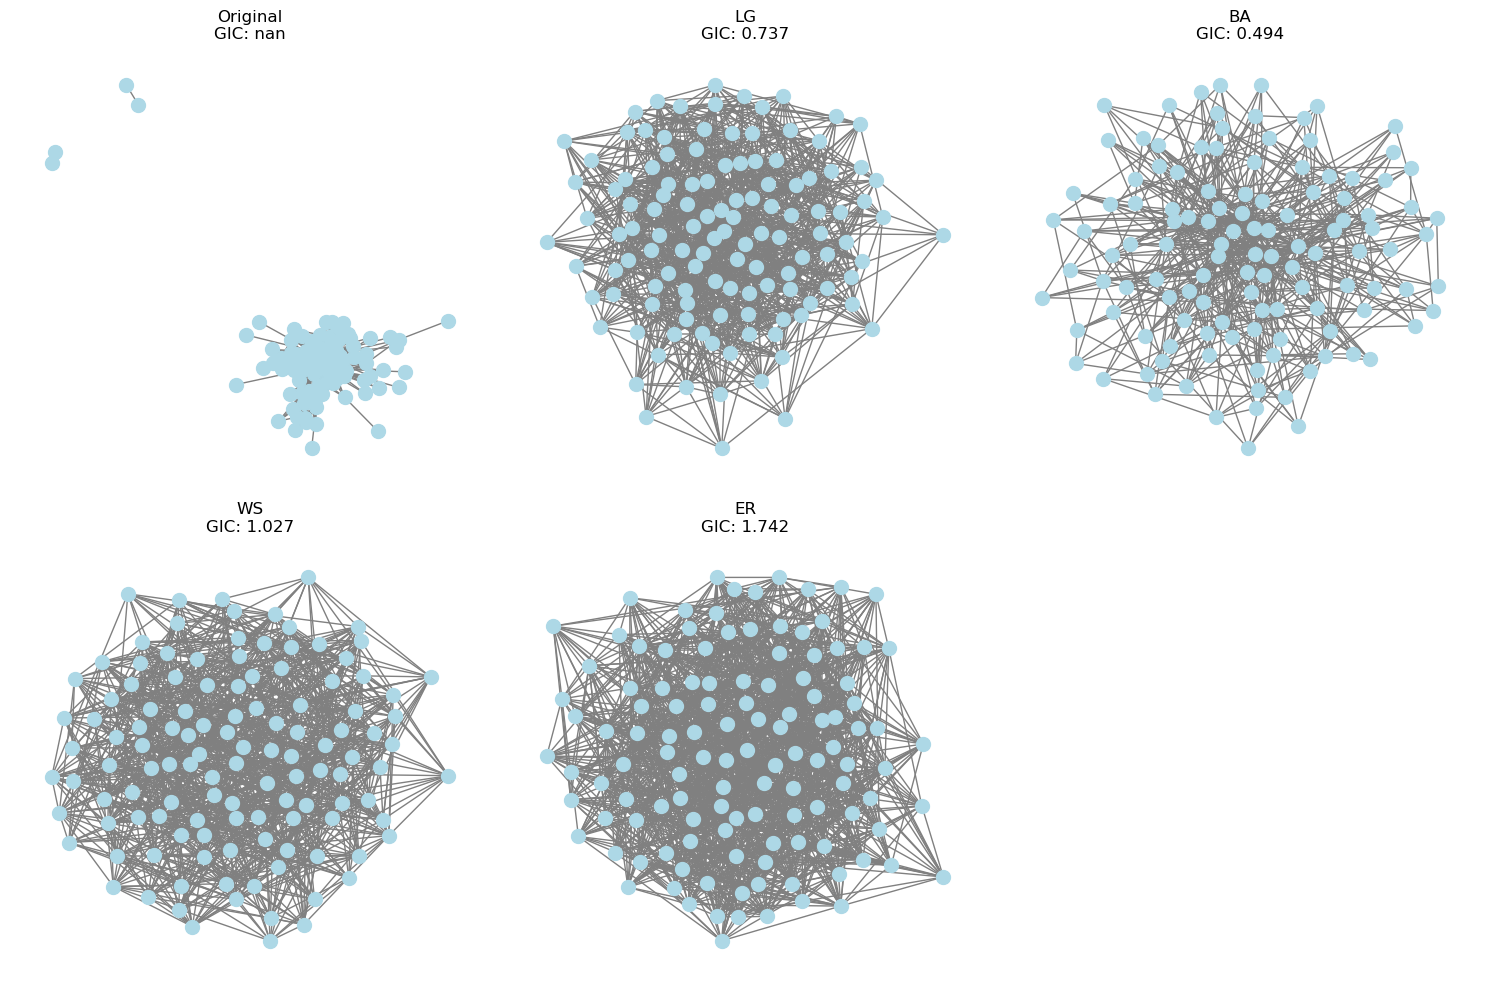

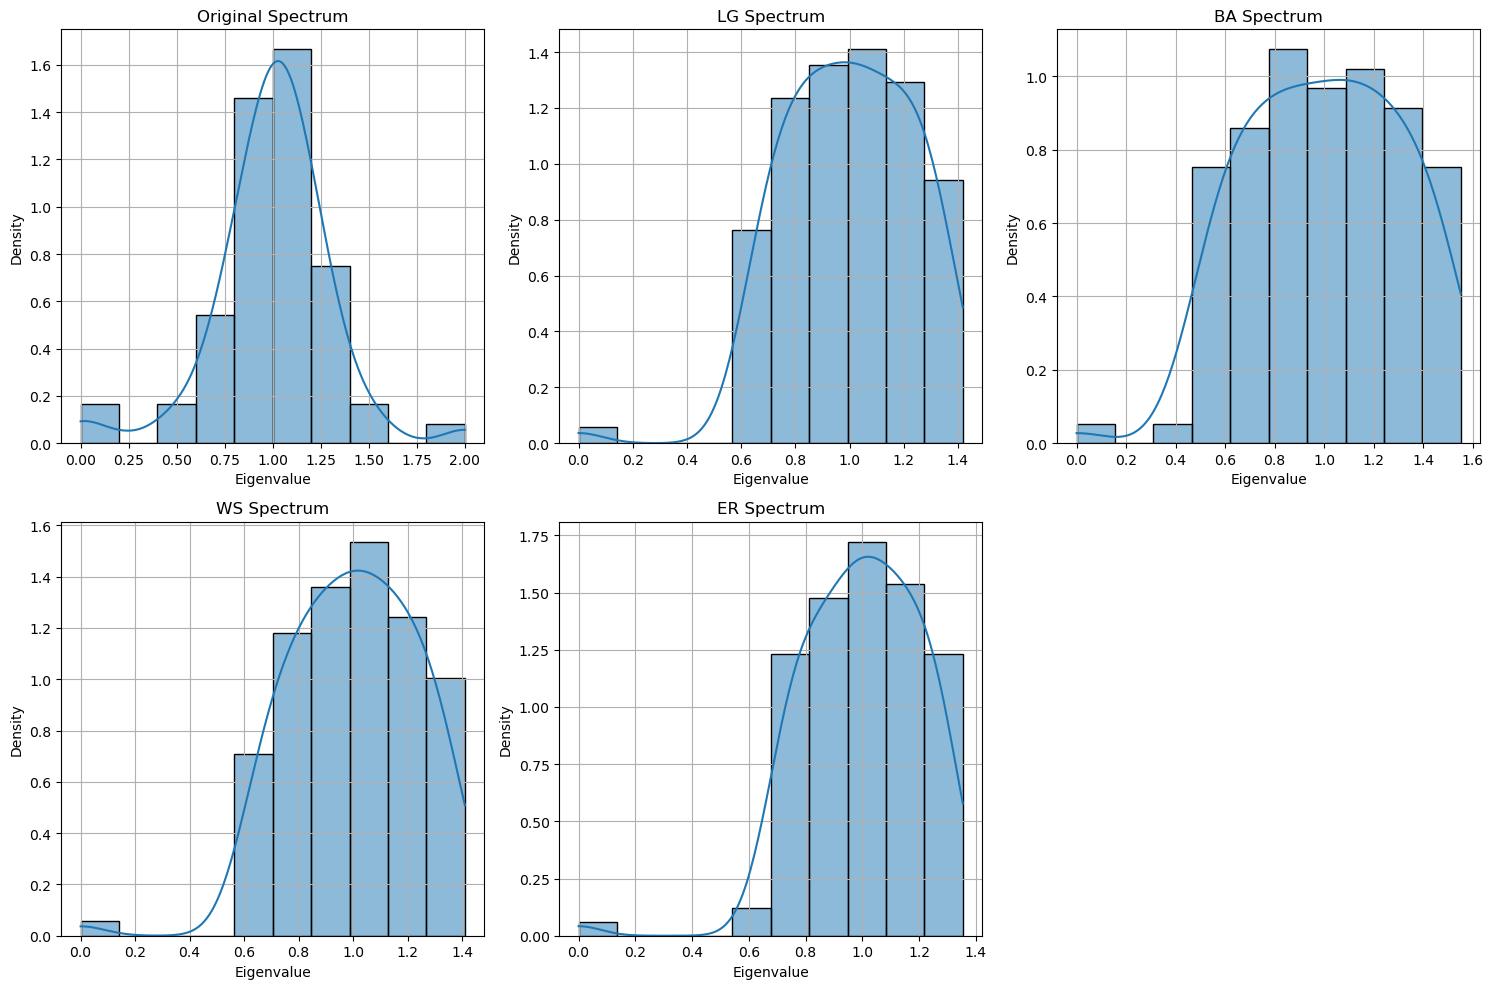

gplus_4


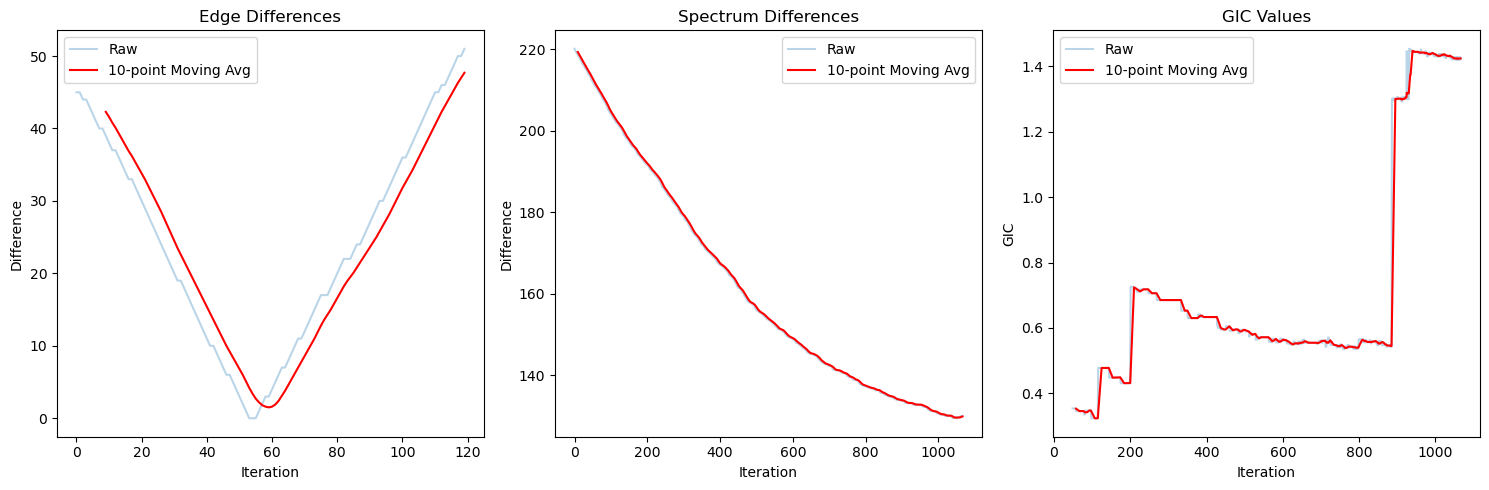

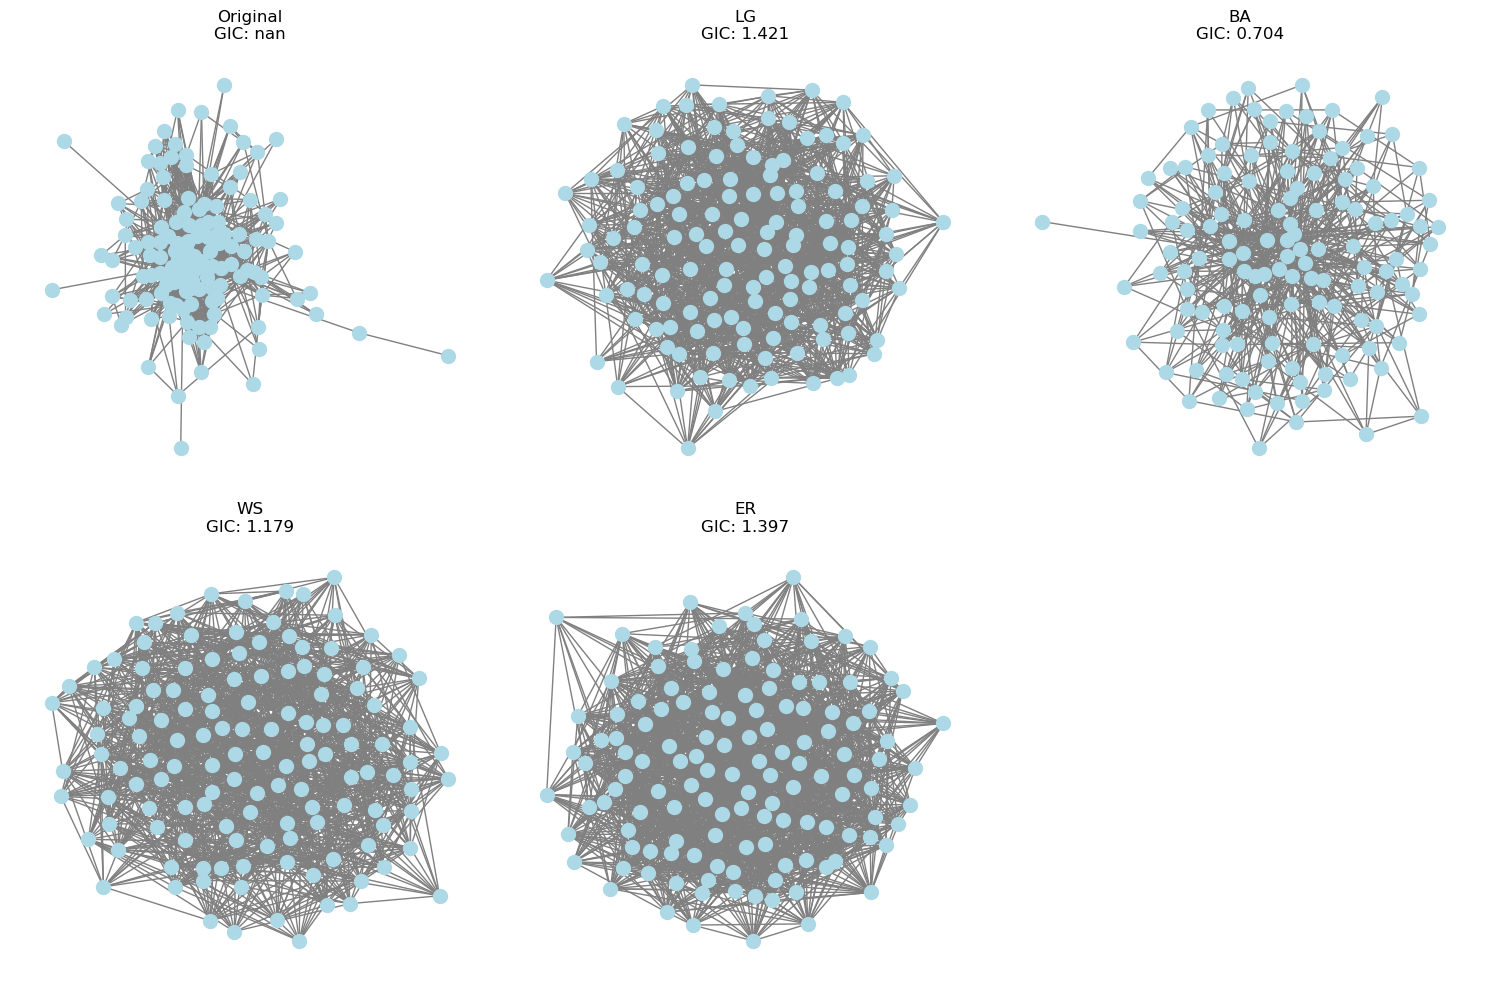

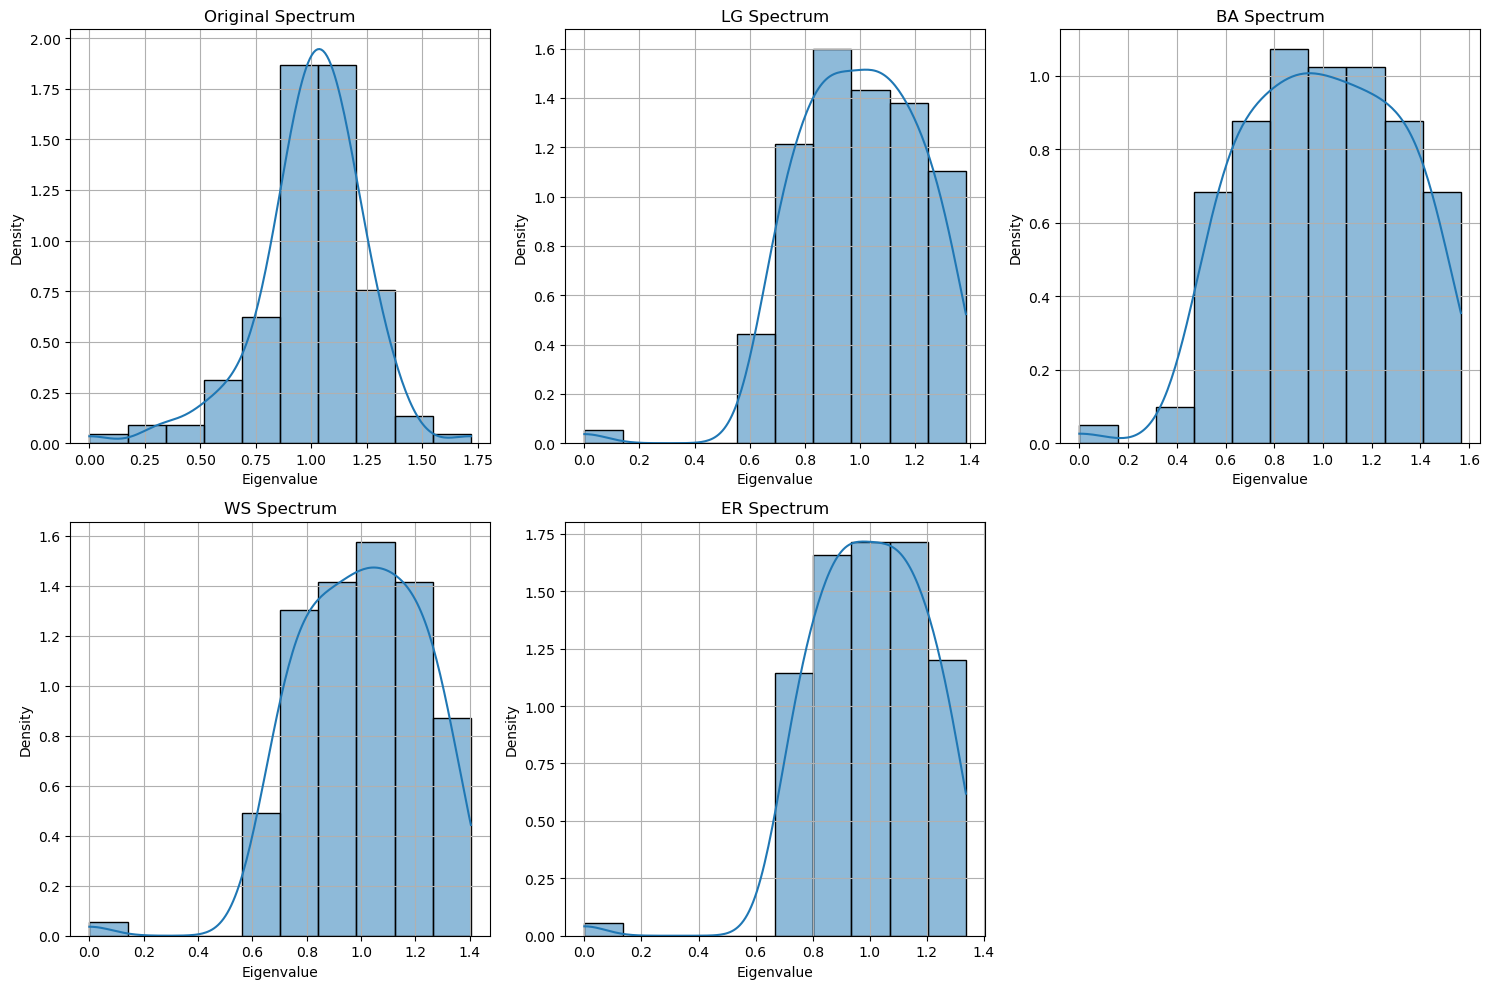

In [28]:
# Gen all plots
os.makedirs(f'imgs', exist_ok=True)
for i in range(len(comparators)):
    if i == 5:
        break
    graph = comparators[i]
    graph_name = f'gplus_{i}'
    print(graph_name)

    #graph = find_comparator_for_connectome('rhesus_cerebral.cortex_1.graphml')
    os.makedirs(f'imgs', exist_ok=True)
    spec_diff = graph.fitted_graphs_data['LG']['metadata']['spectrum_diffs']
    edge_diff = graph.fitted_graphs_data['LG']['metadata']['edge_diffs']
    gic_values = graph.fitted_graphs_data['LG']['metadata']['gic_values']

    # Calculate moving averages with window size of 10
    window = 10
    edge_diff_ma = pd.Series(edge_diff).rolling(window=window).mean()
    spec_diff_ma = pd.Series(spec_diff).rolling(window=window).mean()
    gic_values_ma = pd.Series(gic_values).rolling(window=window).mean()

    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.plot(edge_diff, alpha=0.3, label='Raw')
    plt.plot(edge_diff_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('Edge Differences')
    plt.xlabel('Iteration')
    plt.ylabel('Difference')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(spec_diff, alpha=0.3, label='Raw')
    plt.plot(spec_diff_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('Spectrum Differences')
    plt.xlabel('Iteration')
    plt.ylabel('Difference')
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(gic_values, alpha=0.3, label='Raw')
    plt.plot(gic_values_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('GIC Values')
    plt.xlabel('Iteration')
    plt.ylabel('GIC')
    plt.legend()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_iteration.png', bbox_inches='tight', dpi=300)

    plt.show()
    # Get the graph data for each model
    graph_data = graph.fitted_graphs_data

    # Create a figure with subplots for each model
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    # Plot each graph
    for i, (model, data) in enumerate(graph_data.items()):
        graph2 = data['graph']
        pos = nx.spring_layout(graph2, seed=42)
        
        nx.draw(graph2, pos, ax=axes[i], 
                node_size=100,
                node_color='lightblue',
                edge_color='gray',
                with_labels=False)
        
        # Add title with model name and key metrics
        attrs = data['attributes']
        gic = data['metadata'].get('gic_value', 'N/A')
        title = f"{model}\n"
        # title += f"Nodes: {attrs['nodes']}, Edges: {attrs['edges']}\n"
        # title += f"Density: {attrs['density']:.2f}\n"
        # title += f"Avg Clustering: {attrs['avg_clustering']:.2f}\n"
        title += f"GIC: {gic:.3f}" if isinstance(gic, float) else f"GIC: {gic}"
        axes[i].set_title(title)

    # Remove extra subplot
    axes[-1].remove()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_graph.png', bbox_inches='tight', dpi=300)

    plt.show()
    # Get the graph data for each model
    graph_data = graph.fitted_graphs_data

    # Create a figure with subplots for each model
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    # Plot spectrum for each graph
    for i, (model, data) in enumerate(graph_data.items()):
        graph = data['graph']
        
        try:
            # Calculate eigenvalues
            L = nx.normalized_laplacian_matrix(graph)
            eigenvalues = np.linalg.eigvals(L.toarray())
            eigenvalues = np.real(eigenvalues)  # Get real parts
            
            # Plot histogram and KDE with reduced number of bins
            sns.histplot(data=eigenvalues, kde=True, ax=axes[i], stat='density', bins=10)
            axes[i].set_title(f"{model} Spectrum")
            axes[i].set_xlabel("Eigenvalue")
            axes[i].set_ylabel("Density")
            axes[i].grid(True)
        except MemoryError:
            axes[i].text(0.5, 0.5, "Memory Error", ha='center', va='center')
            axes[i].set_title(f"{model} Spectrum (Failed)")

    # Remove extra subplot
    axes[-1].remove()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_spectrum.png', bbox_inches='tight', dpi=300)

    plt.show()

